#  KIWI INSPECTION

Students should segment the fruits and locate the defect in image “000007”. Special care should be taken to remove as “background” the dirt on the conveyor as well as the sticker in image “000006”.

In [38]:
from functions import *

#### Load the images

In [39]:
directory = 'fruit-inspection-images/final_challenge/'
img_color,img_gray = load_images(directory,[6,10], "RGB")


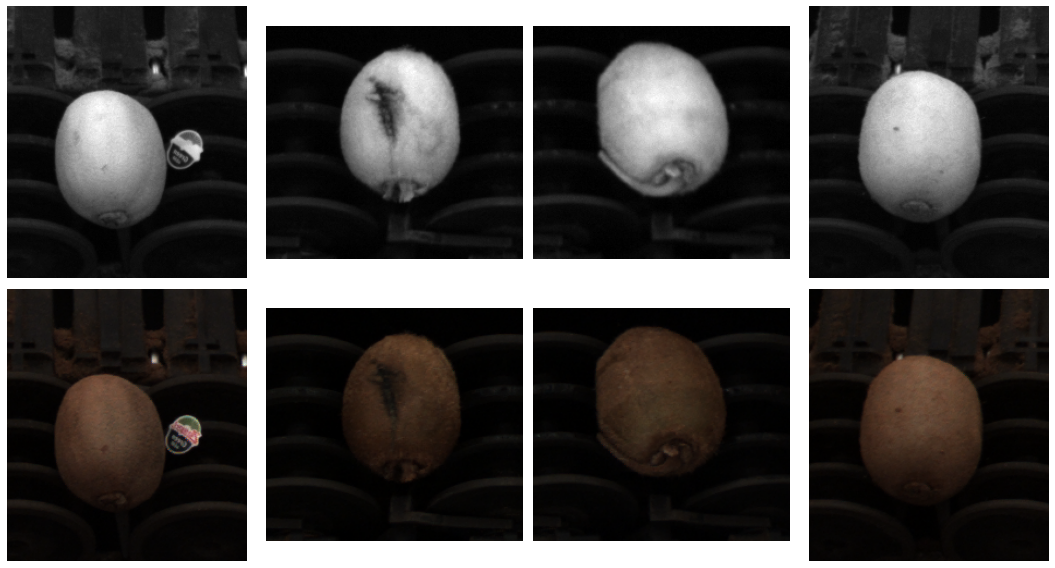

In [40]:
show_images(img_gray+ img_color,rows=2)


### Histogram of the Gray images
We want to analyze the distribution of the gray scale of each image b

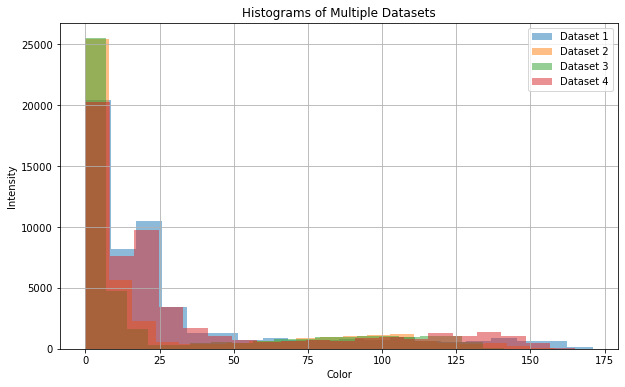

In [41]:
show_histograms(img_gray, bin_count=20)


The istogram is all in the initial, the images are too dark to operate a good segmentation. 

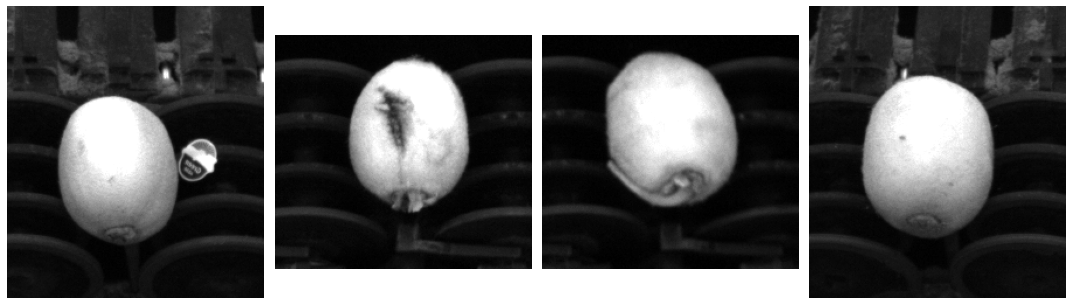

In [42]:
linear_stretched_imgs=[]

for i in range(len(img_gray)):
    l=linear_stretching(np.copy(img_gray[i]),[0,95]).astype(np.uint8)
    linear_stretched_imgs.append(l)

show_images(linear_stretched_imgs,rows=1)


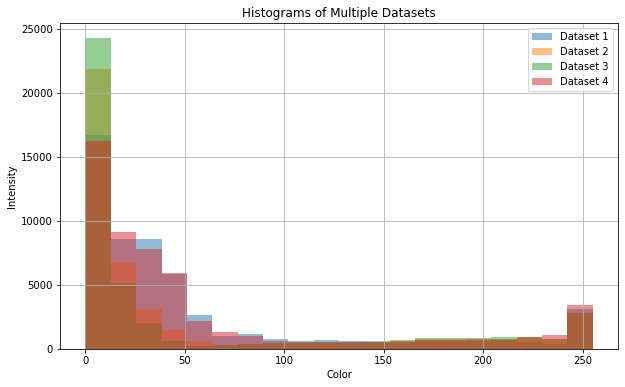

In [43]:
show_histograms(linear_stretched_imgs, bin_count=20)


### Fruit segmentation
Using Thresholding (percentile thresholding) and Flood Fill. This operation have to take in cosideration the usless parts of the kiwi. 

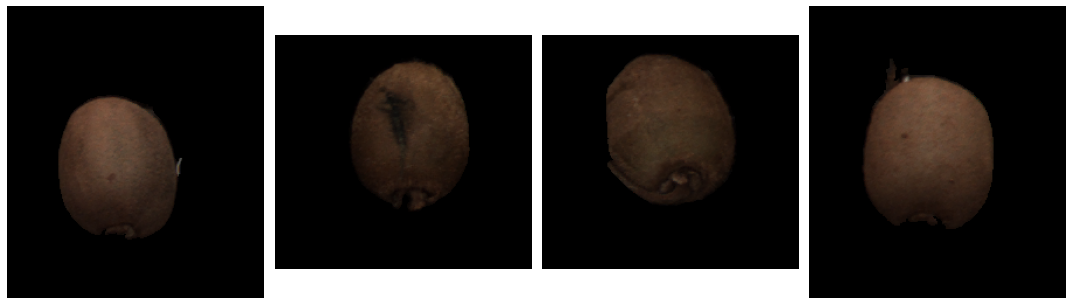

In [57]:
fruits_bw=[]
fruits_color=[]
for i in range(len(linear_stretched_imgs)):
    binary= threshold_by_percentile(linear_stretched_imgs[i],73)

    kiwi= get_kiwi_from_back(binary)
    fruits_bw.append(kiwi)
    fruits_color.append(cv2.bitwise_and(img_color[i], img_color[i], mask=kiwi))

show_images(fruits_color,rows=1)


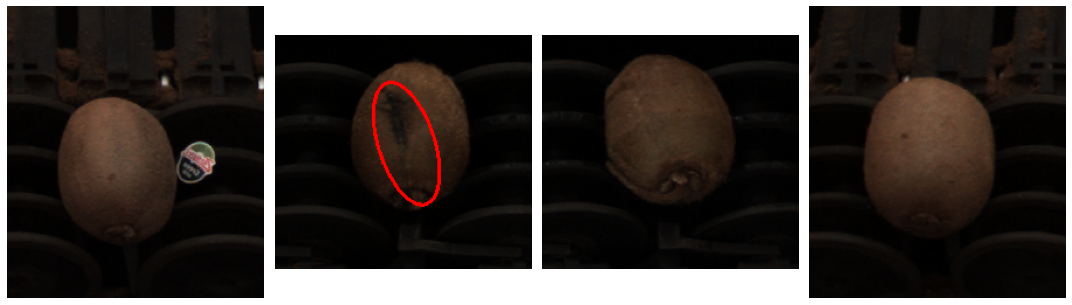

In [47]:
results=[]
edges=[]
for i in range(len(img_gray)):
    display, retval, labels,_= get_defects(linear_stretched_imgs[i],fruits_bw[i], img_color[i])

    defects_counter = 0
    for j in range(1, retval):
        c = np.zeros_like(labels, dtype=np.uint8)
        c[labels == j] = 255
        defects_counter += draw_defects(display, c, 2, 1.1, 1000, float("inf"))

    results.append(display)


show_images(results,rows=1)